In [246]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import imghdr

In [247]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [248]:
tf.config.list_physical_devices('GPU')

[]

In [249]:
data_dir = 'data'

In [250]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [251]:
# os.listdir(os.path.join(data_dir, 'Cat'))

In [252]:
# plt.imshow(cv2.imread(os.path.join('data','Cat','00TB-MEOWS-square640.jpg')))

In [253]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))


Issue with imagedata\Cat\.ipynb_checkpoints


In [356]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [357]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 377 files belonging to 2 classes.


In [358]:
data_iterator = data.as_numpy_iterator() # access data pipeline

In [359]:
batch = next(data_iterator)

In [360]:
len(batch)

2

In [361]:
batch

(array([[[[ 67.00781  ,  89.01172  ,   5.9921875],
          [ 69.03516  ,  92.03516  ,   4.       ],
          [ 72.078125 ,  95.11719  ,   3.921875 ],
          ...,
          [ 61.       ,  87.       ,   0.       ],
          [ 68.90625  ,  91.94141  ,   3.953125 ],
          [ 69.       ,  92.       ,   4.       ]],
 
         [[ 65.0625   ,  86.41797  ,   5.9947205],
          [ 67.08984  ,  89.449005 ,   4.6408386],
          [ 70.12015  ,  93.146545 ,   3.9472046],
          ...,
          [ 60.351562 ,  86.35156  ,   0.       ],
          [ 66.976135 ,  89.37045  ,   3.3122864],
          [ 67.05469  ,  89.40625  ,   3.3515625]],
 
         [[ 61.935883 ,  82.52573  ,   6.4101562],
          [ 63.54593  ,  85.13873  ,   5.3974915],
          [ 66.16016  ,  88.35156  ,   3.9771118],
          ...,
          [ 59.585938 ,  85.171875 ,   0.       ],
          [ 63.878784 ,  85.92081  ,   1.7372131],
          [ 63.929688 ,  85.92969  ,   1.7578125]],
 
         ...,
 
         [[1

In [362]:
batch[0].shape #images as arrays

(32, 256, 256, 3)

In [363]:
batch[1]
#0 = Cat
#1 = Dog


array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1])

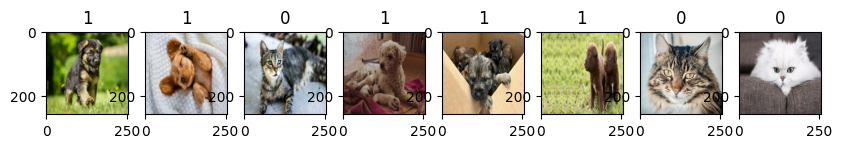

In [364]:
fig, ax = plt.subplots(ncols = 8, figsize=(10,10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [365]:
scaled = batch[0] / 255

In [366]:
data = data.map(lambda x, y: (x/255, y))

In [367]:
scaled_iterator = data.as_numpy_iterator()

In [368]:
scaled_iterator.next()[0].max()

1.0

In [369]:
batch = scaled_iterator.next()

In [370]:
batch[0].max()

1.0

In [371]:
len(data)

12

In [372]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)

In [373]:
test_size

1

In [374]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [375]:
len(test)

1

In [376]:
model = Sequential()

In [377]:
model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

# Flatten the output from Convolutional layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [378]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [379]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [380]:
logdir = 'logs'

In [381]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [382]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 718ms/step - accuracy: 0.4880 - loss: 0.7718 - val_accuracy: 0.6094 - val_loss: 0.6548
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 620ms/step - accuracy: 0.6506 - loss: 0.6433 - val_accuracy: 0.5469 - val_loss: 0.6636
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 586ms/step - accuracy: 0.6818 - loss: 0.6036 - val_accuracy: 0.6094 - val_loss: 0.6364
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 604ms/step - accuracy: 0.6117 - loss: 0.6099 - val_accuracy: 0.7656 - val_loss: 0.4882
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7522 - loss: 0.4780 - val_accuracy: 0.8125 - val_loss: 0.3786
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8489 - loss: 0.3601 - val_accuracy: 0.8125 - val_loss: 0.3528
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9033 - loss: 0.2919 - val_accuracy: 0.9688 - val_loss: 0.1770
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 925ms/step - accuracy: 0.9507 - loss: 0.1676 - val_accuracy: 0.9844 - val_loss: 0.0872

In [383]:
hist.history

{'accuracy': [0.546875,
  0.67578125,
  0.7109375,
  0.66796875,
  0.7890625,
  0.859375,
  0.9140625,
  0.94140625,
  0.96484375,
  0.97265625,
  0.98046875,
  0.96484375,
  0.984375,
  0.98828125,
  0.98828125,
  0.984375,
  0.9921875,
  0.9921875,
  0.99609375,
  0.99609375],
 'loss': [0.7334320545196533,
  0.6416405439376831,
  0.5938045978546143,
  0.5814213752746582,
  0.4521856904029846,
  0.3289817273616791,
  0.249018594622612,
  0.1687072366476059,
  0.11397869884967804,
  0.09300463646650314,
  0.08009961247444153,
  0.11754307150840759,
  0.07458113133907318,
  0.05684969201683998,
  0.03433358669281006,
  0.03583209589123726,
  0.032941918820142746,
  0.028195006772875786,
  0.018846049904823303,
  0.027228716760873795],
 'val_accuracy': [0.609375,
  0.546875,
  0.609375,
  0.765625,
  0.8125,
  0.8125,
  0.96875,
  0.984375,
  0.96875,
  0.984375,
  1.0,
  0.96875,
  1.0,
  1.0,
  0.984375,
  0.984375,
  1.0,
  1.0,
  1.0,
  0.984375],
 'val_loss': [0.6547765135765076,
  

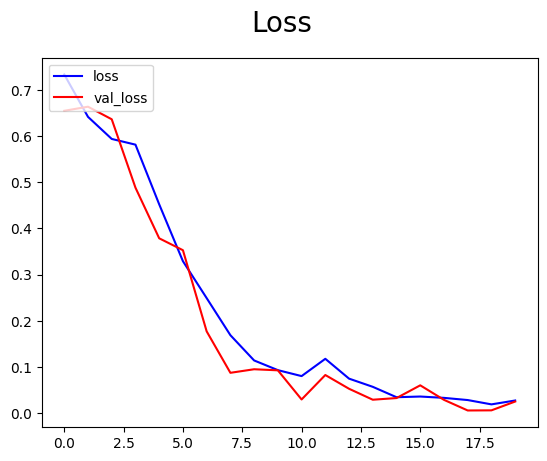

In [384]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

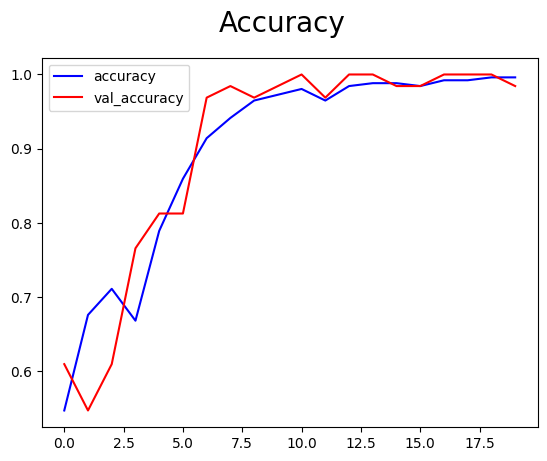

In [385]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [386]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [387]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [388]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


In [389]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


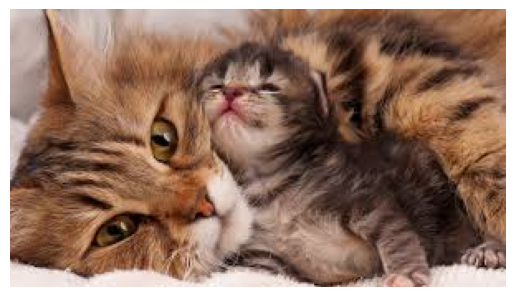

In [444]:
catImg = cv2.imread('catTest.jpeg')

# Check if the image was read correctly
if catImg is None:
    print("Error: Unable to read the image.")
else:
    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(catImg, cv2.COLOR_BGR2RGB)
    
    # Display the image using matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Optional: turn off axis
    plt.show()


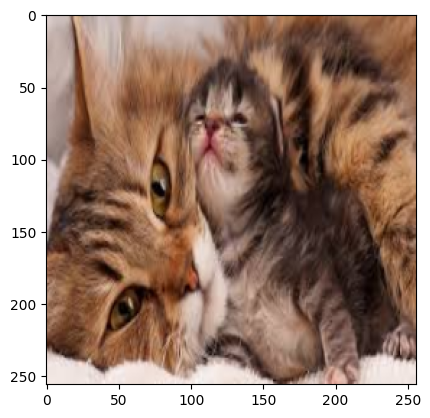

In [445]:
resize = tf.image.resize(img_rgb, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [446]:
np.expand_dims(resize,0)

array([[[[221.91406 , 207.91406 , 206.91406 ],
         [220.48438 , 206.48438 , 205.48438 ],
         [217.71094 , 203.71094 , 202.71094 ],
         ...,
         [182.57031 , 129.57031 ,  95.57031 ],
         [184.48438 , 131.48438 ,  97.484375],
         [186.82812 , 133.82812 ,  99.828125]],

        [[222.39844 , 208.39844 , 207.39844 ],
         [220.96875 , 206.96875 , 205.96875 ],
         [218.19531 , 204.19531 , 203.19531 ],
         ...,
         [182.08594 , 129.08594 ,  95.08594 ],
         [183.6405  , 130.6405  ,  96.6405  ],
         [185.41663 , 132.41663 ,  98.416626]],

        [[223.05469 , 209.05469 , 207.77344 ],
         [221.625   , 207.625   , 206.34375 ],
         [218.79114 , 204.79114 , 203.50989 ],
         ...,
         [181.63074 , 128.63074 ,  94.63074 ],
         [182.53345 , 129.53345 ,  95.53345 ],
         [183.37573 , 130.37573 ,  96.37573 ]],

        ...,

        [[243.85938 , 232.85938 , 228.85938 ],
         [243.85938 , 232.85938 , 228.85938 ]

In [447]:
yhat

array([[0.00501507]], dtype=float32)

In [449]:
yhat = model.predict(np.expand_dims(resize/255,0))
if yhat > 0.5:
    print("Dog")
else:
    print("Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Cat


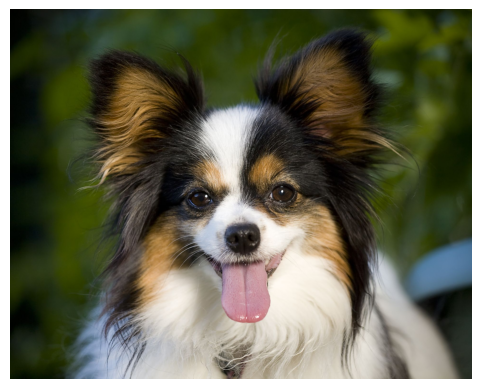

In [450]:
dogImg = cv2.imread('dogtest.jpg')

# Check if the image was read correctly
if dogImg is None:
    print("Error: Unable to read the image.")
else:
    # Convert BGR to RGB
    img_rgb2 = cv2.cvtColor(dogImg, cv2.COLOR_BGR2RGB)
    
    # Display the image using matplotlib
    plt.imshow(img_rgb2)
    plt.axis('off')  # Optional: turn off axis
    plt.show()


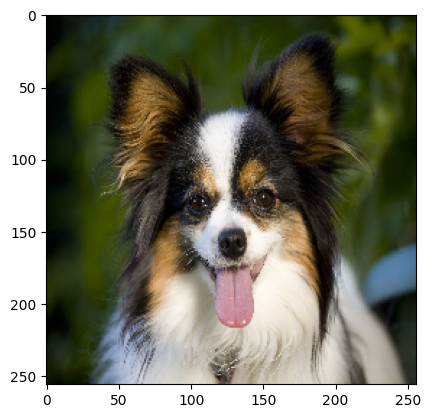

In [451]:
resize = tf.image.resize(img_rgb2, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [452]:
np.expand_dims(resize,0)

array([[[[ 2.        ,  2.        ,  0.        ],
         [ 2.        ,  2.        ,  0.        ],
         [ 1.        ,  3.        ,  0.        ],
         ...,
         [23.06836   , 35.06836   ,  0.        ],
         [32.179626  , 40.253784  ,  0.07415771],
         [39.19336   , 46.66797   ,  1.2441406 ]],

        [[ 2.        ,  2.        ,  0.        ],
         [ 1.        ,  1.        ,  0.        ],
         [ 1.1699219 ,  3.1699219 ,  0.34210205],
         ...,
         [17.423828  , 27.423828  ,  0.42382812],
         [20.513855  , 31.513855  ,  1.3814087 ],
         [29.142578  , 36.14258   ,  2.1425781 ]],

        [[ 2.        ,  2.        ,  0.        ],
         [ 1.        ,  1.        ,  0.        ],
         [ 0.9667969 ,  2.9667969 ,  0.22149658],
         ...,
         [19.626953  , 30.626953  ,  0.6269531 ],
         [18.685242  , 31.783203  ,  1.4893188 ],
         [23.89508   , 33.89508   ,  0.        ]],

        ...,

        [[12.450623  , 26.450623  ,  1

In [453]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [454]:
if yhat > 0.5:
    print("Dog")
else:
    print("Cat")
    

Dog


In [455]:
from tensorflow.keras.models import load_model

In [457]:
model.save(os.path.join('models','catDogModel.keras'))

In [459]:
new_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [460]:
yhatnew = new_model.predict(np.expand_dims(resize/255 ,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [461]:
if yhat > 0.5:
    print("Dog")
else:
    print("Cat")


Dog
